In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-dataset/Stores.csv


In [2]:
df = pd.read_csv('/kaggle/input/stores-dataset/Stores.csv')
df

,Store Number,AreaStore,Property,Type,Old/New,Checkout Number,Revenue
0,1,2100.0,Owned,Hyper,New,6.0,"45,072,000"
1,2,1290.0,Cooperate,Extra,New,5.0,"7,416,000"
2,3,500.0,Rental,Express,New,NaN,"8,592,000"
3,4,2000.0,Owned,Hyper,New,9.0,"48,415,500"
4,5,220.0,Rental,Express,Old,2.0,"3,345,500"
...,...,...,...,...,...,...,...
113,114,1800.0,Rental/Cooperate,Extra,New,9.0,"13,471,000"
114,115,1700.0,Owned,Extra,New,6.0,"29,974,500"
115,116,500.0,Rental/Cooperate,Express,New,2.0,"11,031,500"
116,117,200.0,Rental/Cooperate,Express,New,2.0,"6,173,500"


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store Number     118 non-null    int64  
 1   AreaStore        118 non-null    float64
 2   Property         118 non-null    object 
 3   Type             118 non-null    object 
 4   Old/New          118 non-null    object 
 5   Checkout Number  106 non-null    float64
 6   Revenue          118 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.6+ KB


In [4]:
df['Revenue'] = df['Revenue'].str.replace(',', '').astype('float')

In [5]:
df.describe()

,Store Number,AreaStore,Checkout Number,Revenue
count,118.000000,118.000000,106.000000,1.180000e+02
mean,59.500000,1373.608136,4.792453,2.299805e+07
std,34.207699,1092.453470,2.820729,2.051452e+07
min,1.000000,82.000000,1.000000,2.336000e+06
25%,30.250000,530.500000,3.000000,9.021375e+06
50%,59.500000,1000.000000,4.000000,1.358475e+07
75%,88.750000,1887.500000,6.000000,3.105050e+07
max,118.000000,5600.000000,14.000000,1.000830e+08


**Checking for Missing values**

In [6]:
df.isnull().sum() 

Store Number        0
AreaStore           0
Property            0
Type                0
Old/New             0
Checkout Number    12
Revenue             0
dtype: int64

**Checking for Duplicate values**

In [7]:
df.duplicated().sum() 

0

In [8]:
continous_variables = ['Store Number','AreaStore','Revenue']
discrete_count = ['Checkout Number']
discrete_categorical = ['Property','Type','Old/New']

In [9]:
df['Property'].value_counts()

Property
Owned               39
Cooperate           27
Rental              26
Rental/Cooperate    15
Rental               7
Owned                2
Cooperate            2
Name: count, dtype: int64

In [10]:
df['Property'].unique()

array(['Owned', 'Cooperate', 'Rental', 'Owned ', 'Rental ',
       'Rental/Cooperate', 'Cooperate '], dtype=object)

In [11]:
df['Type'].value_counts()

Type
Express    55
Extra      36
Hyper      27
Name: count, dtype: int64

In [12]:
df['Old/New'].value_counts()

Old/New
New     93
Old     11
New      9
Old      5
Name: count, dtype: int64

In [13]:
df['Old/New'].unique()

array(['New', 'Old', 'New ', 'Old '], dtype=object)

**Checking Correlation b/w Variables**

In [14]:
corr = df[continous_variables].corr()

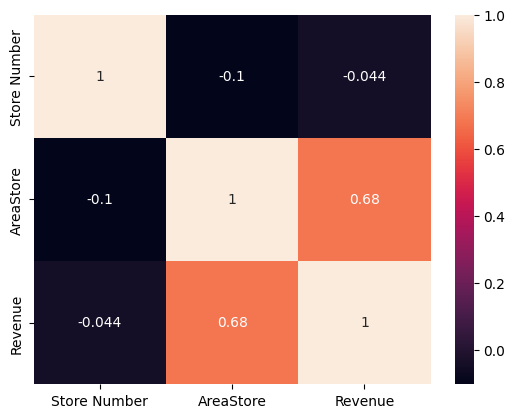

In [15]:
sns.heatmap(corr,annot=True)
plt.show()

In [16]:
df[continous_variables].skew()

Store Number    0.000000
AreaStore       1.560814
Revenue         1.533846
dtype: float64

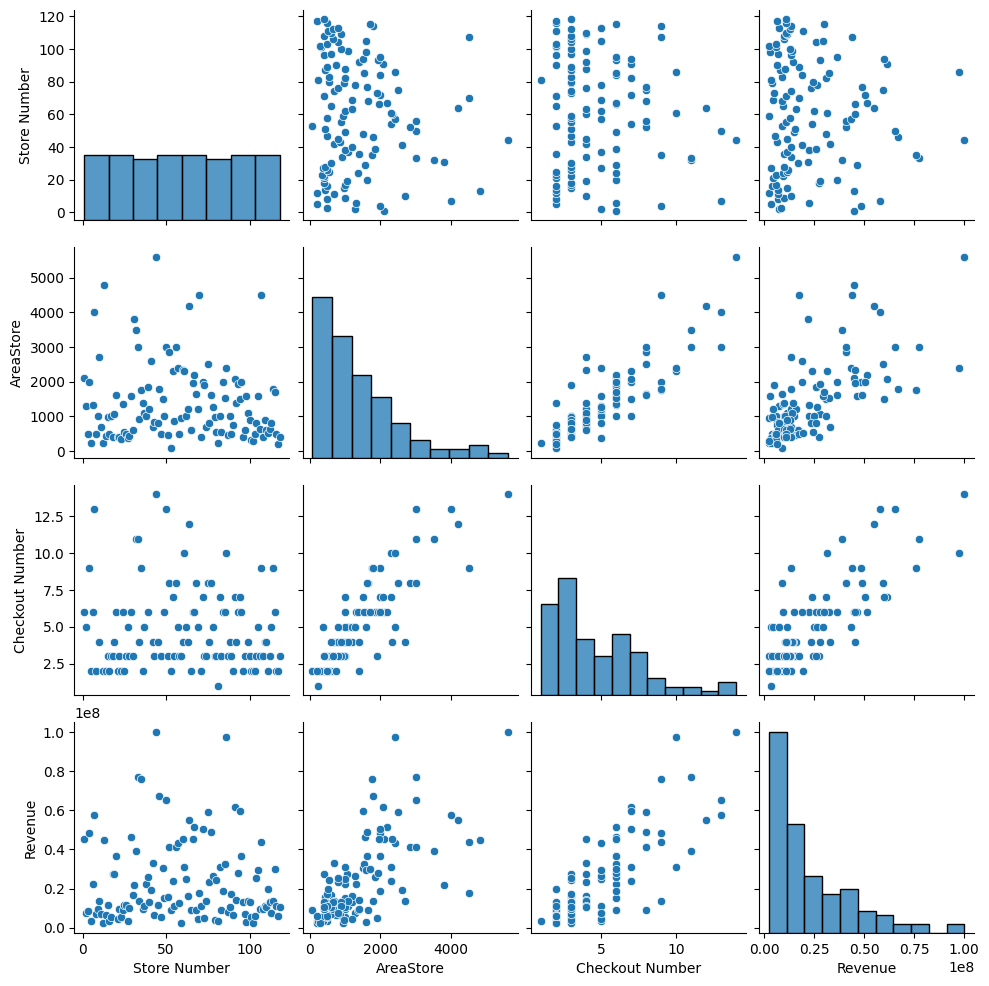

In [17]:
sns.pairplot(df)
plt.show()

# Data Preprocessing

**Handling Missing values**

In [18]:
df['Checkout Number'].fillna(df['Checkout Number'].mean(),inplace=True)

**Changing Checkout Number datatype**

In [19]:
df['Checkout Number'] = df['Checkout Number'].astype(int)

**Encoding**

In [20]:
df['Property'].replace({'Rental ':'Rental','Owned ':'Owned','Cooperate ':'Cooperate'},inplace=True)

df['Old/New'].replace({'Old ':'Old','New ':'New'},inplace=True)

In [21]:
df['Property'].replace({'Rental':0,'Owned':1,'Cooperate':2,'Rental/Cooperate':3},inplace=True)
df['Type'].replace({'Express':0,'Extra':1,'Hyper':2},inplace=True)
df['Old/New'].replace({'Old':1,'New':0},inplace=True)

**Deleting Store Number column bcz it doesn't hold significance in modeling**

In [22]:
df.drop(columns=['Store Number'],inplace=True)

**Create new column "RevToArea" based on the ratio of "Revenue" to "AreaStore"**

In [23]:
df['RevToArea'] = df['Revenue'] / df['AreaStore']

**Defining X & Y**

In [24]:
x = df[['Checkout Number','RevToArea']]
y = df['Revenue']

**Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Scaling**

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Multiple Linear Regression

**Modeling**

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=11)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

print('Coefficient:',reg.coef_)
print('Intercept:',reg.intercept_)

Coefficient: [5.86377364e+06 7.36938268e+02]
Intercept: -18610687.417009693


**Evaluation**

In [28]:
train_pred = reg.predict(x_train)
from sklearn.metrics import r2_score
print('Train R2:',r2_score(train_pred,y_train))

test_pred = reg.predict(x_test)
print('Test R2:',r2_score(test_pred,y_test))

from sklearn.model_selection import cross_val_score
print('CV score:',cross_val_score(reg,x_train,y_train,cv=5).mean())

Train R2: 0.6545013988817951
Test R2: 0.4847994823218026
CV score: 0.7039767683286489


**Assumptions for Linear Regression**

In [29]:
error = y_test - test_pred

**Linearity of Error**

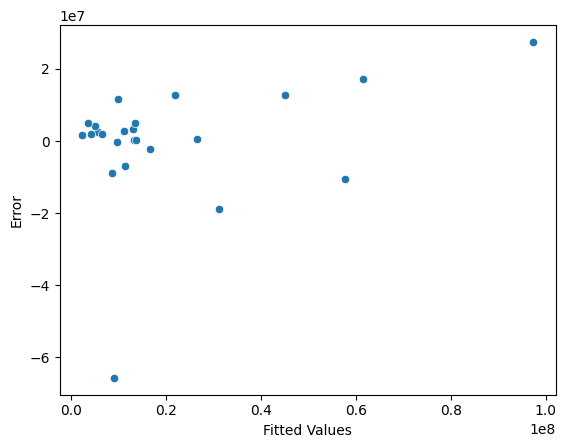

In [30]:
sns.scatterplot(x=y_test,y=error)
plt.xlabel('Fitted Values')
plt.ylabel('Error')
plt.show()

**Normality of Error**

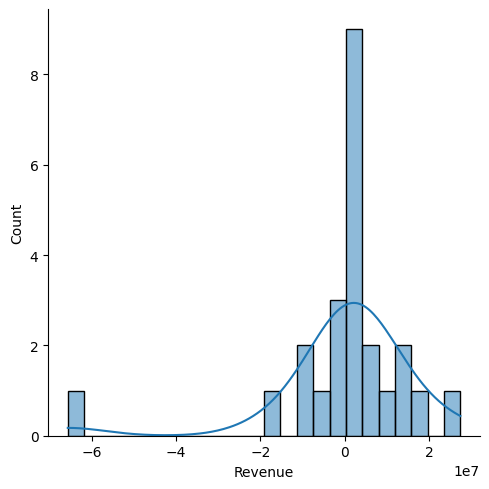

In [31]:
sns.displot(error,kde=True)
plt.show()

**Equal Variance of Error**

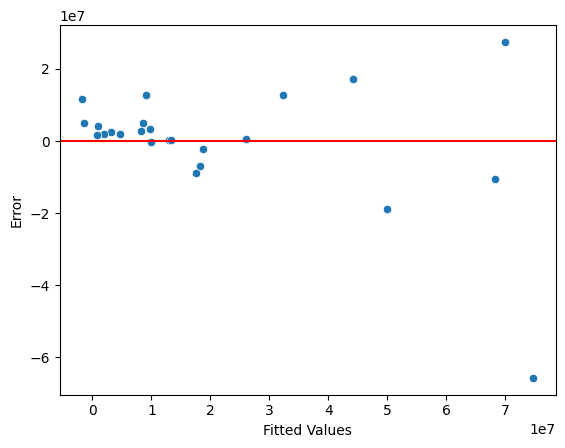

In [32]:
sns.scatterplot(x=test_pred,y=error)
plt.axhline(y=0,color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Error')
plt.show()

**Variable Significance**

In [33]:
import statsmodels.formula.api as smf
model = smf.ols('y~x',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 11 May 2024   Prob (F-statistic):           3.62e-31
Time:                        08:00:41   Log-Likelihood:                -2081.7
No. Observations:                 118   AIC:                             4169.
Df Residuals:                     115   BIC:                             4178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.427e+07   2.56e+06     -5.566      0.000   -1.94e+07   -9.19e+06
x[0]        5.972e+06   3.88e+05     15.405      0.000     5.2e+06    6.74e+06
x[1]         480.6137     75.784      6.342      0.000     330.501     630.727
==============================================================================
Omnibus:                       14.712   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.947
Skew:                           0.224   Prob(JB):                     6.39e-11
Kurtosis:                       6.057   Cond. No.                     5.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression

**HyperParameter Tunning** (for finding best degree)

In [34]:
train_r2=[]
test_r2=[]

for i in range(2,11):
    from sklearn.preprocessing import PolynomialFeatures
    poly_converter = PolynomialFeatures(degree=i)
    x_train_poly = pd.DataFrame(poly_converter.fit_transform(x_train))
    
    from sklearn.linear_model import LinearRegression
    reg=LinearRegression()
    reg.fit(x_train_poly,y_train)
    
    train_pred = reg.predict(x_train_poly)
    train_r2.append(r2_score(train_pred,y_train))
    
    test_pred = reg.predict(poly_converter.fit_transform(x_test))
    test_r2.append(r2_score(test_pred,y_test))

In [35]:
train_r2

[0.7485011108776083,
 0.7806658795736766,
 0.7778556361076343,
 0.7590203229619242,
 0.6132457629210606,
 0.38882363958607735,
 0.17557888705086877,
 -0.027274781172991425,
 -0.2310275725965638]

In [36]:
test_r2

[0.8616453689875136,
 0.6363718815926889,
 0.15665987144422533,
 -0.03915666407532048,
 -0.04213999804373869,
 -0.04263717380383003,
 -0.041662962835979034,
 -0.04372923602927714,
 -0.04357916110250071]

**Modeling**

In [37]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2)
x_train_poly = pd.DataFrame(polynomial_converter.fit_transform(x_train))

from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x_train_poly,y_train)

print('Coefficient:',reg1.coef_)
print('Intercept:',reg1.intercept_)

Coefficient: [ 0.00000000e+00  1.84323979e+06  5.00231314e+02  7.10563377e+04
  1.59895576e+02 -8.53404449e-03]
Intercept: -7311853.11229524


**Evaluation**

In [38]:
train_pred = reg1.predict(x_train_poly)
print('Train R2:',r2_score(train_pred,y_train))

test_pred = reg1.predict(polynomial_converter.fit_transform(x_test))
print('Test R2:',r2_score(test_pred,y_test))

print('CV score:',cross_val_score(reg1,x,y,cv=5).mean())

Train R2: 0.7485011108776083
Test R2: 0.8616453689875136
CV score: 0.5068467951380189


# Lasso Regularization

**HyperParameter Tunning** (for finding best value of α)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
estimator = Lasso()

param_grid = {'alpha':[0.1,0.5,1,7,50,60]}

model = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

model.fit(x_train,y_train)

model.best_params_

{'alpha': 0.5}

**Modeling**

In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=60)
lasso.fit(x_train,y_train)

print('Coefficient:',lasso.coef_)
print('Intercept:',lasso.intercept_)

Coefficient: [5.86376503e+06 7.36938167e+02]
Intercept: -18610644.456349935


**Evaluation**

In [41]:
train_pred = lasso.predict(x_train)
print('Train R2:',r2_score(train_pred,y_train))

test_pred = lasso.predict(x_test)
print('Test R2:',r2_score(test_pred,y_test))

print('CV score',cross_val_score(lasso,x,y,cv=5).mean())

Train R2: 0.6545005658582823
Test R2: 0.48479857627777134
CV score 0.5068469002820704


# Ridge Regularization

**HyperParameter Tunning**

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
estimator = Ridge()

param_grid = {'alpha':list(range(1,100))}

model = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

model.fit(x_train,y_train)

model.best_params_

{'alpha': 1}

**Modeling**

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=53)
ridge.fit(x_train,y_train)

print('Coefficient:',ridge.coef_)
print('Intercept:',ridge.intercept_)

Coefficient: [5.42505241e+06 7.31851722e+02]
Intercept: -16421490.590993386


**Evaluation**

In [44]:
train_pred = ridge.predict(x_train)
print('Train R2:',r2_score(train_pred,y_train))

test_pred = ridge.predict(x_test)
print('Test R2:',r2_score(test_pred,y_test))

print('CV score',cross_val_score(ridge,x,y,cv=5).mean())

Train R2: 0.6029398523359115
Test R2: 0.4330334663406348
CV score 0.5077300914707006


# ElasticNet Regularization

**HyperParameter Tunning** (for finding best value for α and λ)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
estimator = ElasticNet()

param_grid = {'alpha':[0.1,0.2,1,2,3,5,10], 'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}

model = GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')

model.fit(x_train,y_train)

model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

**Modeling**

In [46]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=3,l1_ratio=0.75)
en.fit(x_train,y_train)

print('Coefficient:',ridge.coef_)
print('Intercept:',ridge.intercept_)

Coefficient: [5.42505241e+06 7.31851722e+02]
Intercept: -16421490.590993386


**Evaluation**

In [47]:
train_pred = en.predict(x_train)
print('Train R2:',r2_score(train_pred,y_train))

test_pred = en.predict(x_test)
print('Test R2:',r2_score(test_pred,y_test))

print('CV score',cross_val_score(en,x,y,cv=5).mean())

Train R2: 0.5835535789384938
Test R2: 0.41527409469714227
CV score 0.5057940464746621


# THE END!